# Rombus Demo

This is a demo of how to use the rombus package to make an ROM (reduced order model) for the function: $y(x, a_1, a_2, a_3)=a_2*x^2+a_1*x+a_0$.


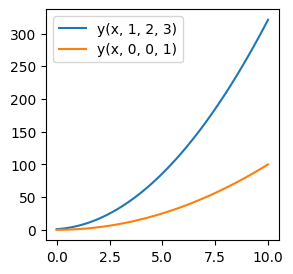

In [27]:
import matplotlib.pyplot as plt
from numpy import ndarray, polyval
from typing import NamedTuple
from collections import namedtuple
import numpy as np

def y(p:NamedTuple, x:ndarray):
    return polyval([p.a2, p.a1, p.a0], x)

param = namedtuple('param', ['a0', 'a1', 'a2'])

x = np.linspace(0, 10, 100)
plt.figure(figsize=(3, 3))
plt.plot(x, y(param(1,2,3), x), label='y(x, 1, 2, 3)')
plt.plot(x, y(param(0,0,1), x), label='y(x, 0, 0, 1)')
plt.legend(loc='upper left');


To build a ROM, we first define this model within Rombus, and specify the ranges of the parameters. Store the below in a file called `my_model.py` (or whatever you want to call it).


..include:
    my_model.py


Now, specify a set of points (in this case, the file `my_model_samples.csv`) to build your ROM from.




In [13]:
# generate random samples for a1, a2, a3 (each from ranges -10, 10)
import numpy as np

def generate_points(n=50):
    return np.array([
        np.random.uniform(-10,10,n),
        np.random.uniform(-10,10,n),
        np.random.uniform(-10,10,n)
    ])

filename_samples = 'my_model_samples.csv'
points = generate_points()
with open(filename_samples, "w") as f:
    for a0, a1, a2 in points.T:
        f.write(f"{a0},{a1},{a2}\n")

Now we can build the ROM using these points with
```bash
$ rombus build my_model:Model my_model_samples.csv
```
If youd like to do this within python, you can use the following code:

In [19]:
from rombus.model import RombusModel
from rombus.samples import Samples
from rombus.rom import ReducedOrderModel

model = 'my_model:Model'

# Load model
model_loaded = RombusModel.load(model)

# Load samples
samples = Samples(model_loaded, filename=filename_samples)

# Build ROM
ROM = ReducedOrderModel(model_loaded, samples).build(do_step=None)

# Write ROM
ROM_fname = 'my_model.hdf5'
ROM.write(ROM_fname)
print("Wrote ROM to", ROM_fname)

Wrote ROM to my_model.hdf5


This produces an _HDF5_ file named `my_model.hdf5`.  You can then use your new ROM in your Python projects like this:

In [41]:
from rombus.rom import ReducedOrderModel

ROM = ReducedOrderModel.from_file(ROM_fname)
sample = ROM.model.sample({"a0":0,"a1":0,"a2":1})
model_ROM = ROM.evaluate(sample)

for x, y in zip(ROM.model.domain,model_ROM):
    print(f"{x:5.2f} {y:6.2f}")

 0.00   0.00
 1.00   1.00
 2.00   4.00
 3.00   9.00
 4.00  16.00
 5.00  25.00
 6.00  36.00
 7.00  49.00
 8.00  64.00
 9.00  81.00
10.00 100.00


Lets compare this to the original model:


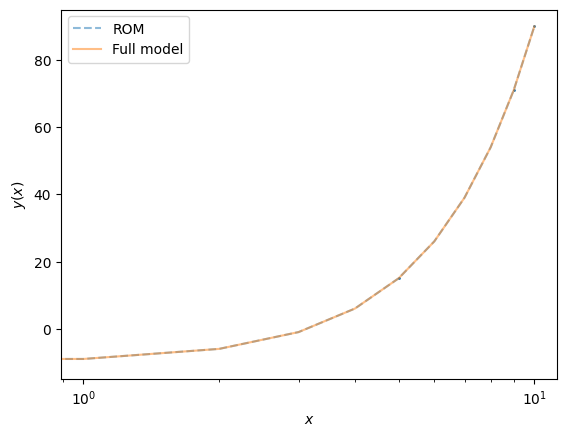

In [42]:
import rombus.plots as rom_plotting

rom_plotting.compare_rom_to_true(ROM, model_params_in=dict(a0=-10, a1=0, a2=1))

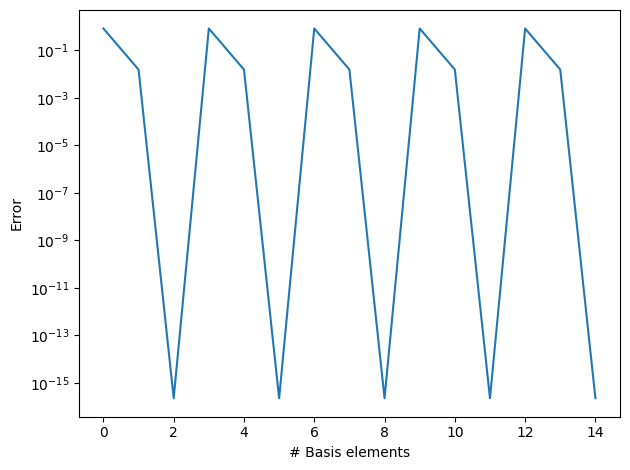

In [37]:
rom_plotting.bases_errors(ROM)

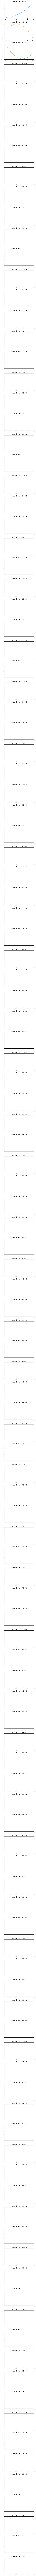

In [38]:
rom_plotting.bases(ROM)

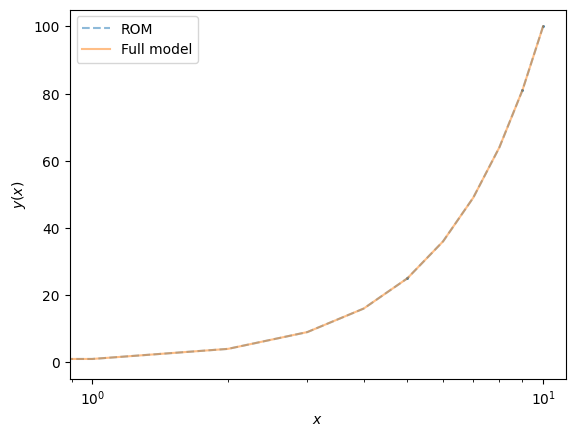